In [1]:
import os
from IPython.display import display, Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy.stats import linregress
import math
from functools import reduce
import matplotlib
import argparse
from Bio import SeqIO, Entrez, pairwise2
Entrez.email = 'hongyingsun1101@gmail.com'
from Bio.SeqRecord import SeqRecord
import re, time
import os, sys, glob
import random
import uuid
# from skbio.tree import TreeNode
# from skbio import read
# from skbio.stats.distance import DistanceMatrix
# from skbio.stats.distance import DissimilarityMatrix

from scipy import stats
from ast import literal_eval
import sqlite3
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")



In [15]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("all_data.csv", index_col=0)
score= pd.read_csv("score_merged.csv", index_col=0)

In [3]:
reference ={'A':"RDP_10398", 'B':'RDP_5224', 'C':"RDP_1017", 'D':'RDP_92', 'E':'RDP_12'}

In [4]:
df.E_prichness.describe()


count    5974.000000
mean        6.038165
std         4.627806
min         1.000000
25%         1.000000
50%         5.000000
75%        11.000000
max        17.000000
Name: E_prichness, dtype: float64

In [5]:
#pplacer_ref_list = ['A','B','C', 'D','E'],pplacer_stats_list=['_adcl_log','_edpl', '_prichness'],community_list=['0','1','2','3','4'],cutoff_list=['mean','min','25%','50%','75%']


In [6]:
def is_float(string):
  try:
    return float(string) and '.' in string  # True if string is a number contains a dot
  except ValueError:  # String is not a number
    return False

In [7]:
reference

{'A': 'RDP_10398',
 'B': 'RDP_5224',
 'C': 'RDP_1017',
 'D': 'RDP_92',
 'E': 'RDP_12'}

In [8]:
columnList=list(df.columns)

In [9]:
communityList = df.community

In [10]:
# df.describe()

In [16]:
def plot_pplacer(variable):
    fig, axes = plt.subplots(nrows=3, ncols=2)
    ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

    ax0.hist(df['A'+variable])
    ax0.set_title('A'+variable)

    ax1.hist(df['B'+variable])
    ax1.set_title('B'+variable)

    ax2.hist(df['C'+variable])
    ax2.set_title('C'+variable)

    ax3.hist(df['D'+variable])
    ax3.set_title('D'+variable)
    ax4.hist(df['E'+variable])
    ax4.set_title('E'+variable)


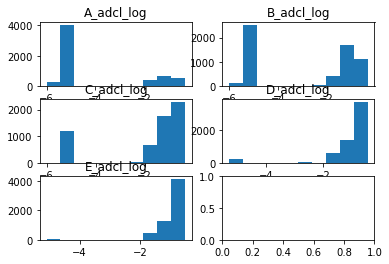

In [17]:
plot_pplacer('_adcl_log')

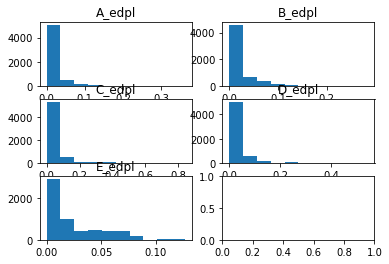

In [18]:
plot_pplacer('_edpl')

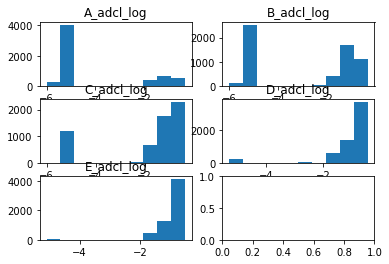

In [19]:

plot_pplacer('_adcl_log')

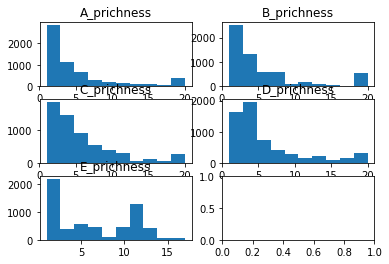

In [20]:
plot_pplacer('_prichness')

In [22]:
# plot_pplacer('0');

In [23]:
def plotScatter(reference,community):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flatten()

    ax0.scatter(df[reference+'_adcl_log'], df[reference+community])
    ax0.set_title(reference+community+' vs '+ reference + '_adcl_log')
    
    ax1.scatter(df[reference+'_edpl'], df[reference+community])
    ax1.set_title(reference+community+' vs '+ reference + '_edpl')
    
    ax2.scatter(df[reference+'_mindistl'], df[reference+community])
    ax2.set_title(reference+community+' vs '+ reference + '_mindistl')
    
    ax3.scatter(df[reference+'_prichness'], df[reference+community])
    ax3.set_title(reference+community+' vs '+ reference + '_prichness')


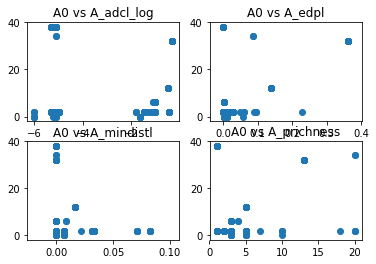

In [24]:
plotScatter('A','0')

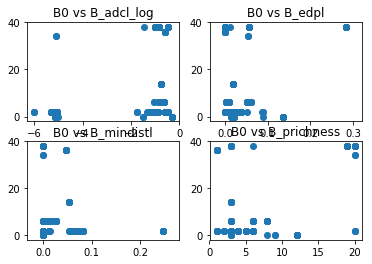

In [25]:
plotScatter('B','0')

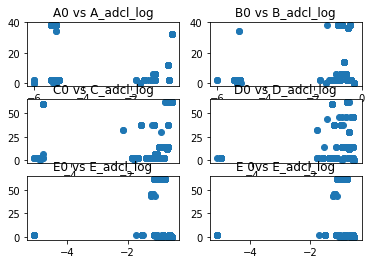

In [26]:
def plotScatterRef(variable,community):
    fig, axes = plt.subplots(nrows=3, ncols=2)
    ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

    ax0.scatter(df['A'+variable], df['A'+community])
    ax0.set_title('A' + community +' vs A' + variable)
    ax1.scatter(df['B'+variable], df['B'+community])
    ax1.set_title('B' + community +' vs B' + variable)
    
    ax2.scatter(df['C'+variable], df['C'+community])
    ax2.set_title('C' + community +' vs C' + variable)
    
    ax3.scatter(df['D'+variable], df['D'+community])
    ax3.set_title('D' + community +' vs D' + variable)  
    
    ax4.scatter(df['E'+variable], df['E'+community])
    ax4.set_title('E' + community +' vs E' + variable)   
    
    ax5.scatter(df['E'+variable], df['E'+community])
    ax5.set_title('E ' + community +'vs E' + variable)       


    
    
plotScatterRef('_adcl_log','0');

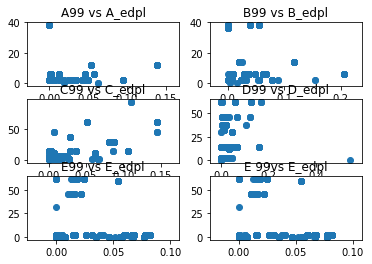

In [27]:
    
plotScatterRef('_edpl','99');

In [28]:
cols=df.columns.tolist()
# cols[:20]

In [29]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [30]:
def plot_roc(data_X, class_label):
    trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)
    model = RandomForestClassifier()
    model.fit(trainX, trainy)
    probs = model.predict_proba(testX)
    probs = probs[:, 1]
    auc = roc_auc_score(testy, probs)
    fpr, tpr, thresholds = roc_curve(testy, probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print('optimal_threshold: %.2f' % optimal_threshold)
    print('AUC: %.2f' % auc)
    print( thresholds)
#     print( thresholds)
#     print('Model: ')
#     print(model)
    plot_roc_curve(fpr, tpr)

In [31]:
def makeTable(headerRow,columnizedData,columnSpacing=2):
    """Creates a technical paper style, left justified table"""
    from numpy import array,max,vectorize

    cols = array(columnizedData,dtype=str)
    colSizes = [max(vectorize(len)(col)) for col in cols]

    header = ''
    rows = ['' for i in cols[0]]

    for i in range(0,len(headerRow)):
        if len(headerRow[i]) > colSizes[i]: colSizes[i]=len(headerRow[i])
        headerRow[i]+=' '*(colSizes[i]-len(headerRow[i]))
        header+=headerRow[i]
        if not i == len(headerRow)-1: header+=' '*columnSpacing

        for j in range(0,len(cols[i])):
            if len(cols[i][j]) < colSizes[i]:
                cols[i][j]+=' '*(colSizes[i]-len(cols[i][j])+columnSpacing)
            rows[j]+=cols[i][j]
            if not i == len(headerRow)-1: rows[j]+=' '*columnSpacing

    line = '-'*len(header)
    print(line)
    print(header)
    print(line)
    for row in rows: print(row)
    print(line)
header = ['AUROC','Categoroy']
cutoffs = ['0.9-1.0','0.8-0.9','0.7-0.8','0.6-0.7','0.5-0.6']
evalualtion = ['Very good','Good','Fair', 'Poor', 'Fail']
makeTable(header,[cutoffs,evalualtion])

------------------
AUROC    Categoroy
------------------
0.9-1.0  Very good
0.8-0.9  Good     
0.7-0.8  Fair     
0.6-0.7  Poor     
0.5-0.6  Fail     
------------------


In [32]:
def plot_roc_microbiome(data_X, class_label, x, y, data_test=False):
    if(not data_test):
#         print("data_set is False")
        trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)
        model = RandomForestClassifier()
        model.fit(trainX, trainy)
        probs = model.predict_proba(testX)
        probs = probs[:, 1]
        auc = roc_auc_score(testy, probs)
        fpr, tpr, thresholds = roc_curve(testy, probs)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]
        print('optimal_threshold: %.2f' % optimal_threshold)
        print('AUC: %.2f' % auc)
        print('thresholds: ' + thresholds)

        plot_roc_curve(fpr, tpr)

    else:
        print("data_set is True")
        trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)
        model = RandomForestClassifier()
        model.fit(trainX, trainy)
        probs1 = model.predict_proba(testX)
        probs1 = probs1[:, 1]
        auc1 = roc_auc_score(testy, probs1)
        fpr1, tpr1, thresholds1 = roc_curve(testy, probs1)
        optimal_idx1 = np.argmax(tpr1 - fpr1)
        optimal_threshold1 = thresholds1[optimal_idx1]
        print('AUC1: %.2f' % auc1)
        print('optimal_threshold1: %.2f' % optimal_threshold1)
        print(thresholds1)
        plot_roc_curve(fpr1, tpr1)
        
        probs2 = model.predict_proba(x)
        probs2 = probs2[:, 1]
        auc2 = roc_auc_score(y, probs2)
        fpr2, tpr2, thresholds2 = roc_curve(y, probs2)
        optimal_idx2 = np.argmax(tpr2 - fpr2)
        optimal_threshold2 = thresholds2[optimal_idx2]
        print('AUC2: %.2f' % auc2)
        print('optimal_threshold2: %.2f' % optimal_threshold2)
        print( thresholds2)
        plot_roc_curve(fpr2, tpr2)


In [33]:
def plot_roc_curve_microbiome(pplacer_ref_list, pplacer_stats_list, community_list, cutoff_list, scoreOption=True):
    for (refIndex,pplacer_ref) in enumerate(pplacer_ref_list):
#     for refIndex in range(len(pplacer_ref_list)):
#         pplacer_ref = pplacer_ref_list[refIndex]
        for (statsIndex,pplacer_stats) in enumerate(pplacer_stats_list):
#         for statsIndex in range(len(pplacer_stats_list)):
#             pplacer_stats = pplacer_stats_list[statsIndex]
            for (communityIndex,community) in enumerate(community_list):
#             for communityIndex in range(len(community_list)):
#                 community = community_list[communityIndex]
                for (i, cutoff) in enumerate(cutoff_list):
#                 for i in range(len(cutoff_list)):
#                     cutoff=cutoff_list[i]
                    if(is_float(cutoff)):
                        cutoff_binary=float(cutoff)
                    else:
                        if(scoreOption):
                            cutoff_binary=float(df[pplacer_ref+community].describe().loc[[cutoff]])

                        else:
                            cutoff_binary = float(df[pplacer_ref+pplacer_stats].describe().loc[[cutoff]])
                    if(scoreOption):
                        mask = df[pplacer_ref+community] <=  cutoff_binary
                        df.loc[mask, pplacer_ref+community+'_binary'] = 1
                        mask = df[pplacer_ref+community] >cutoff_binary
                        df.loc[mask, pplacer_ref+community+'_binary'] = 0
                        df_binary = df[[pplacer_ref+pplacer_stats, pplacer_ref+community+'_binary']].dropna()
                        data_stats = df_binary[pplacer_ref+pplacer_stats].to_numpy().reshape(-1,1)
                        binary_label =  df_binary[pplacer_ref+community+'_binary'].to_numpy()
                        print(' The score cutoff '+ cutoff +' for Reference ' + pplacer_ref +' community ' + community   + ' with pplacer_stats '+ pplacer_stats[1:] + ': %.2f' % cutoff_binary )
                        plot_roc(data_stats,binary_label)
                    else:
                        mask = df[pplacer_ref+pplacer_stats] <=  cutoff_binary
                        df.loc[mask, pplacer_ref+pplacer_stats+'_binary'] = 1
                        mask = df[pplacer_ref+pplacer_stats] >cutoff_binary
                        df.loc[mask, pplacer_ref+pplacer_stats+'_binary'] = 0
                        df_binary = df[[pplacer_ref+community, pplacer_ref+pplacer_stats+'_binary']].dropna()
                        data_stats = df_binary[pplacer_ref+community].to_numpy().reshape(-1,1)
                        binary_label =  df_binary[pplacer_ref+pplacer_stats+'_binary'].to_numpy()
                        print(' The pplacer_stats_cutoff '+ cutoff +' for Reference ' + pplacer_ref +' community ' + community + ' pplacer_stats '  + pplacer_stats[1:]  + ': %.2f' % cutoff_binary )
                        plot_roc(data_stats,binary_label)
                

# different reference same pplacer stats same community to test different cutoffs  and different references for score

In [34]:
# plot_roc_curve_microbiome(pplacer_ref_list = ['A','B','C','D','E'],pplacer_stats_list=['_adcl_log'],community_list=['A'],cutoff_list=['mean', 'min','25%','50%','75%'],scoreOption=False)

In [35]:
df['E0'].describe()

count    605.000000
mean      14.601653
std       25.354082
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max       62.000000
Name: E0, dtype: float64

# Different reference same pplacer stats same community to test different cutoffs  and different references for adcl_log

# Fitting on large reference and test on small reference datasets

In [36]:
def plot_roc_curve_microbiome_test2(pplacer_ref_list, pplacer_stats_list, community_list, cutoff_list, test_data_list, scoreOption=True, testOption=False):
    for refIndex in range(len(pplacer_ref_list)):
        pplacer_ref = pplacer_ref_list[refIndex]
        for statsIndex in range(len(pplacer_stats_list)):
            pplacer_stats = pplacer_stats_list[statsIndex]
            for communityIndex in range(len(community_list)):
                community = community_list[communityIndex]
                for i in range(len(cutoff_list)):
                    cutoff=cutoff_list[i]
                    if(is_float(cutoff)):
                        cutoff_binary=float(cutoff)
                    else:
                        if(scoreOption):
                            cutoff_binary=float(df[pplacer_ref+community].describe().loc[[cutoff]])

                        else:
                            cutoff_binary = float(df[pplacer_ref+pplacer_stats].describe().loc[[cutoff]])
                    # no test situation, which is the default option
                    if (not testOption):

                        if(scoreOption):
                            mask = df[pplacer_ref+community] <=  cutoff_binary
                            df.loc[mask, pplacer_ref+community+'_binary'] = 1
                            mask = df[pplacer_ref+community] >cutoff_binary
                            df.loc[mask, pplacer_ref+community+'_binary'] = 0
                            df_binary = df[[pplacer_ref+pplacer_stats, pplacer_ref+community+'_binary']].dropna()
                            data_stats = df_binary[pplacer_ref+pplacer_stats].to_numpy().reshape(-1,1)
                            binary_label =  df_binary[pplacer_ref+community+'_binary'].to_numpy()
                            print(' The score cutoff '+ cutoff +' for Reference ' + pplacer_ref +' community ' + community   + ' with pplacer_stats '+ pplacer_stats[1:] + ': %.2f' % cutoff_binary )
                            # plot_roc(data_stats,binary_label)
                            plot_roc_microbiome(data_stats,binary_label,x=None,y=None,data_test=False)
                        else:
                            mask = df[pplacer_ref+pplacer_stats] <=  cutoff_binary
                            df.loc[mask, pplacer_ref+pplacer_stats+'_binary'] = 1
                            mask = df[pplacer_ref+pplacer_stats] >cutoff_binary
                            df.loc[mask, pplacer_ref+pplacer_stats+'_binary'] = 0
                            df_binary = df[[pplacer_ref+community, pplacer_ref+pplacer_stats+'_binary']].dropna()
                            data_stats = df_binary[pplacer_ref+community].to_numpy().reshape(-1,1)
                            binary_label =  df_binary[pplacer_ref+pplacer_stats+'_binary'].to_numpy()
                            print(' The pplacer_stats_cutoff '+ cutoff +' for Reference ' + pplacer_ref +' community ' + community + ' pplacer_stats '  + pplacer_stats[1:]  + ': %.2f' % cutoff_binary )
                            # plot_roc(data_stats,binary_label)
                            plot_roc_microbiome(data_stats,binary_label,x=None,y=None,data_test=False)
                    
                    # if there is test
                    else:
                        for j in range(len(test_data_list)):
                            test=test_data_list[j]
                            if(scoreOption):
                                mask = df[pplacer_ref+community] <=  cutoff_binary
                                df.loc[mask, pplacer_ref+community+'_binary'] = 1
                                mask = df[pplacer_ref+community] >cutoff_binary
                                df.loc[mask, pplacer_ref+community+'_binary'] = 0
                                df_binary = df[[pplacer_ref+pplacer_stats, pplacer_ref+community+'_binary']].dropna()
                                data_stats = df_binary[pplacer_ref+pplacer_stats].to_numpy().reshape(-1,1)
                                binary_label =  df_binary[pplacer_ref+community+'_binary'].to_numpy()
                                
                                mask_test = df[test+community] <=  cutoff_binary
                                df.loc[mask_test, test+community+'_binary'] = 1
                                mask_test = df[test+community] >cutoff_binary
                                df.loc[mask_test, test+community+'_binary'] = 0
                                df_binary = df[[test+pplacer_stats, test+community+'_binary']].dropna()
                                x = df_binary[test+pplacer_stats].to_numpy().reshape(-1,1)
                                y =  df_binary[test+community+'_binary'].to_numpy()

                                print(' The score cutoff '+ cutoff +' for Reference ' + pplacer_ref +' community ' + community   + ' with pplacer_stats '+ pplacer_stats[1:] + ' compared with test ' + test +': %.2f' % cutoff_binary )
                                plot_roc_microbiome(data_stats,binary_label,x,y,data_test=True)
                            else:

                                mask = df[pplacer_ref+pplacer_stats] <=  cutoff_binary
                                df.loc[mask, pplacer_ref+pplacer_stats+'_binary'] = 1
                                mask = df[pplacer_ref+pplacer_stats] >cutoff_binary
                                df.loc[mask, pplacer_ref+pplacer_stats+'_binary'] = 0
                                df_binary = df[[pplacer_ref+community, pplacer_ref+pplacer_stats+'_binary']].dropna()
                                data_stats = df_binary[pplacer_ref+community].to_numpy().reshape(-1,1)
                                binary_label =  df_binary[pplacer_ref+pplacer_stats+'_binary'].to_numpy()
                                
                                mask_test = df[test+pplacer_stats] <=  cutoff_binary
                                df.loc[mask_test, test+pplacer_stats+'_binary'] = 1
                                mask_test = df[test+pplacer_stats] >cutoff_binary
                                df.loc[mask_test, test+pplacer_stats+'_binary'] = 0
                                df_binary = df[[test+community, test+pplacer_stats+'_binary']].dropna()
                                x = df_binary[test+community].to_numpy().reshape(-1,1)
                                y =  df_binary[test+pplacer_stats+'_binary'].to_numpy()
                  
                                print(' The pplacer_stats_cutoff '+ cutoff +' for Reference ' + pplacer_ref +' community ' + community + ' pplacer_stats '  + pplacer_stats[1:] + ' compared with test ' + test  + ': %.2f' % cutoff_binary )
                                plot_roc_microbiome(data_stats,binary_label,x,y,data_test=True)

## Model from larger reference sets to fit data used small reference set.  Could be worse on both directions

In [37]:
# plot_roc_curve_microbiome_test2(pplacer_ref_list = ['A'],pplacer_stats_list=['_adcl_log','_edpl','_prichness','_mindistl'],community_list=['0'],cutoff_list=['2.00'], test_data_list=['B','C','D','E'],testOption=True, scoreOption=True)

In [38]:
# plot_roc_curve_microbiome_test2(pplacer_ref_list = ['A'],pplacer_stats_list=['_adcl_log'],community_list=['0'],cutoff_list=['-4.00'], test_data_list=['B','C','D','E'],testOption=True, scoreOption=False)

In [39]:
# plot_roc_curve_microbiome_test2(pplacer_ref_list = ['A'],pplacer_stats_list=['_adcl_log'],community_list=['0'],cutoff_list=['25%'], test_data_list=['B','C'],testOption=True, scoreOption=False)

In [40]:
# plot_roc_curve_microbiome_test2(pplacer_ref_list = ['B'],pplacer_stats_list=['_adcl_log'],community_list=['0'],cutoff_list=['25%'], test_data_list=['A','C'],testOption=True, scoreOption=False)

In [41]:
# print("the head for df is {}".format(df.head)+ " the columns of the df is {}".format(df.columns))
#       

In [42]:
# df['A0'].describe(), df['B0'].describe(), df['C0'].describe(), df['D0'].describe(),df['E0'].describe()


In [43]:

# for community in ['A','B','C','D','E']:
#     for i in range(10):
#             print(df[community+str(i)].describe())


In [44]:
df_0 = df

In [45]:
# plot_pplacer('90')

In [46]:
# plotScatter('B','0')

In [47]:
# plotScatterRef('_adcl_log','0')

In [48]:
# plot_pplacer('_adcl_log')

In [49]:
df['A_adcl_log'].describe()



count    5974.000000
mean       -4.083366
std         1.837510
min        -5.995679
25%        -5.221126
50%        -5.096367
75%        -1.706947
max        -0.344675
Name: A_adcl_log, dtype: float64

In [50]:
# plot_pplacer('0')

In [51]:
df['A0'].describe()


count    605.000000
mean       6.390083
std       10.778008
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max       38.000000
Name: A0, dtype: float64

In [52]:
df1 = df[(df['A0']>10)]

In [53]:
df1['A0'].describe()

count    99.000000
mean     28.626263
std      10.791707
min      12.000000
25%      12.000000
50%      32.000000
75%      38.000000
max      38.000000
Name: A0, dtype: float64

In [54]:
99/605

0.16363636363636364

In [55]:
df1['B0'].describe()

count    99.000000
mean     25.070707
std      17.438670
min       0.000000
25%       0.000000
50%      36.000000
75%      38.000000
max      38.000000
Name: B0, dtype: float64

In [56]:
df2=df[['seqID','A0','B0', 'C0','D0','E0']].dropna()

In [57]:
df3 = df2[(df2['A0']>10) & (df2['B0']>10)  & (df2['C0']>10)  & (df2['D0']>10) & (df2['E0']>10)]

In [58]:
# df2.describe(), df3.describe()

In [59]:
df3

,seqID,A0,B0,C0,D0,E0
5313,CC11CM5SCR137ef78188b94db7b59504dc64363aa3,34.0,34.0,32.0,32.0,44.0
5314,CC11CM0SCR35529da454f0497fa16e04841e8e1639,34.0,34.0,32.0,32.0,44.0


In [60]:
2/605

0.003305785123966942

In [61]:
dfc90 = df[(df['A90']>10) & (df['B90']>10)  & (df['C90']>10)  & (df['D90']>10) & (df['E90']>10)]

In [62]:
dfc90['B0'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: B0, dtype: float64

In [63]:



df[(df.community=='CC11CM0')]['C_adcl_log'].dropna().describe()

count    55.000000
mean     -1.885119
std       1.762885
min      -5.300162
25%      -1.773077
50%      -1.040954
75%      -0.682030
max      -0.373058
Name: C_adcl_log, dtype: float64

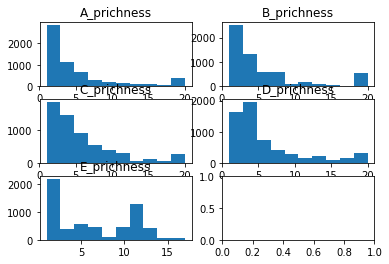

In [64]:
plot_pplacer('_prichness')

In [65]:
df['A_prichness'].describe()

count    5974.000000
mean        4.727653
std         5.465596
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        20.000000
Name: A_prichness, dtype: float64

In [66]:
df[df.A0>10].A0.count()

99

In [67]:
df[df.A0>10].A0.count()/df.A0.count()

0.16363636363636364

In [68]:

# df.head()

In [69]:
df.A_adcl.count()

5974

In [70]:
d={"a":1, "b":2}

In [71]:
d

{'a': 1, 'b': 2}

In [72]:
dd = pd.Series(d, name='score')

In [73]:

dd.index.name="community"

In [74]:
dd.reset_index()

,community,score
0,a,1
1,b,2


In [75]:
"CC11CM"+str(0)

'CC11CM0'

In [76]:
c0=df['A0'][df['community']=='CC11CM0']

In [77]:
per=c0[c0>10].count()/c0.count()

In [78]:
def generateScore(stats, referenceID,scorecutoff,statscutoff):
    d1={}
    d2={}
    for i in range(100):
        values = df[referenceID+str(i)][df.community=='CC11CM'+str(i)]
        statsvalues = df[stats][df['community']=='CC11CM'+str(i)]
        d1['CC11CM'+str(i)] = values[values>scorecutoff].count()/values.count()
        d2['CC11CM'+str(i)] =statsvalues[statsvalues>statscutoff].count()/statsvalues.count()
    d1=pd.Series(d1, name=referenceID)
    d1.index.name='community'
    d1=d1.reset_index()
    d2=pd.Series(d2, name=stats)
    d2.index.name='community'
    d2=d2.reset_index()
    dt = pd.concat([d1,d2], axis=1)
#     dt=dt.set_index('community')
    return (dt)

In [79]:
dt=generateScore('A_adcl', 'A', 10, 0.001)

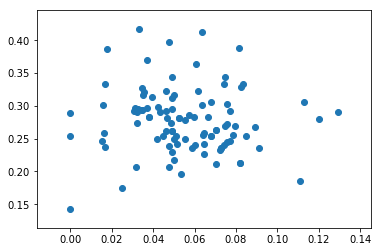

In [80]:
plt.scatter(dt.A, dt.A_adcl)

In [81]:

t=[]
for referenceID in ['A','B','C','D','E']:
    t.append(generateScore('A_adcl', referenceID, 10, 0.001))

In [82]:


t[0].head()

,community,A,community,A_adcl
0,CC11CM0,0.090909,CC11CM0,0.236364
1,CC11CM1,0.082192,CC11CM1,0.328767
2,CC11CM10,0.075758,CC11CM10,0.272727
3,CC11CM11,0.046154,CC11CM11,0.323077
4,CC11CM12,0.046875,CC11CM12,0.281250


In [83]:
tt = pd.concat([t[0],t[1],t[2],t[3],t[4]], axis=1)

In [84]:
def generateScoreu(stats, referenceID,scorecutoff,statscutoff):
    d1={}
    d2={}
    for i in range(100):
        values = df[referenceID+str(i)][df.community=='CC11CM'+str(i)]
        statsvalues = df[referenceID+stats][df['community']=='CC11CM'+str(i)]
        d1['CC11CM'+str(i)] = values[values>scorecutoff].count()/values.count()
        d2['CC11CM'+str(i)] =statsvalues[statsvalues>statscutoff].count()/statsvalues.count()
    d1=pd.Series(d1, name=referenceID)
    d1.index.name='community'
    d1=d1.reset_index()
    d2=pd.Series(d2, name=referenceID+stats)
    d2.index.name='community'
    d2=d2.reset_index()
    dt = pd.concat([d1,d2], axis=1)
    dt=dt.loc[:, ~dt.columns.duplicated()]
    dt=dt.set_index('community')
    return (dt)

In [85]:
dtu=generateScoreu('_adcl', 'A', 10, 0.001)

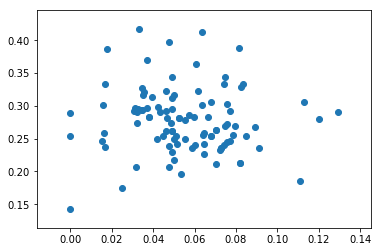

In [86]:
plt.scatter(dtu.A, dtu.A_adcl)

In [87]:
t=[]
statsdir= {'_adcl':0.0001, '_edpl':0,'_prichness':10,'_mindistl':0.05}
for stats in statsdir.keys():

    for referenceID in ['A','B','C','D','E']:
        t.append(generateScoreu(stats, referenceID, 10, statsdir[stats]))

In [88]:
ttt = pd.concat([t[0],t[1],t[2],t[3],t[4],t[5],t[6],t[7],t[8],t[9],t[10],t[11],t[12],t[13],t[14],t[15],t[16],t[17],t[18],t[19]], axis=1)
ttt=ttt.loc[:, ~ttt.columns.duplicated()]

In [89]:
# ttt.describe()

In [90]:
ttt.to_csv("community-based.csv")

(array([5.696e+03, 1.570e+02, 6.800e+01, 0.000e+00, 2.200e+01, 0.000e+00,
        0.000e+00, 5.000e+00, 0.000e+00, 2.600e+01]),
 array([3.48920365e-07, 2.98496853e-02, 5.96990217e-02, 8.95483581e-02,
        1.19397695e-01, 1.49247031e-01, 1.79096367e-01, 2.08945704e-01,
        2.38795040e-01, 2.68644377e-01, 2.98493713e-01]),
 <a list of 10 Patch objects>)

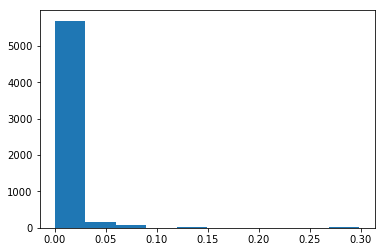

In [91]:

plt.hist(df.A_mindistl)

In [92]:

dp =pd.read_csv("community-based.csv", index_col=0)

In [93]:

dp.describe()

,A,A_mindistl,B,B_mindistl,C,C_mindistl,D,D_mindistl,E,E_mindistl,...,A_adcl,B_adcl,C_adcl,D_adcl,E_adcl,A_prichness,B_prichness,C_prichness,D_prichness,E_prichness
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.055034,0.025369,0.116043,0.114361,0.318386,0.097589,0.647292,0.198869,0.229600,0.290481,...,0.277586,0.557102,0.799584,0.962263,0.989559,0.140234,0.147809,0.142149,0.160060,0.304304
std,0.024318,0.018591,0.032415,0.030794,0.048526,0.030017,0.051736,0.042808,0.045910,0.047167,...,0.049060,0.054352,0.044362,0.017520,0.008343,0.035764,0.041895,0.037576,0.034324,0.042562
min,0.000000,0.000000,0.051724,0.037037,0.216667,0.033333,0.491803,0.109091,0.097222,0.156863,...,0.142857,0.406780,0.666667,0.916667,0.975000,0.052632,0.042553,0.056604,0.080645,0.190476
25%,0.037736,0.015873,0.095238,0.095013,0.285119,0.079132,0.612455,0.172414,0.193768,0.265789,...,0.246154,0.516532,0.773585,0.949788,0.983051,0.118395,0.123077,0.120690,0.144585,0.274194
50%,0.052178,0.020221,0.112007,0.111111,0.315789,0.096774,0.649561,0.196400,0.229508,0.298507,...,0.275986,0.563333,0.800000,0.966667,0.984615,0.137147,0.146257,0.140351,0.155048,0.306452
75%,0.072530,0.034044,0.136310,0.134615,0.346392,0.114754,0.682738,0.229823,0.261943,0.323077,...,0.301587,0.600000,0.830769,0.978723,1.000000,0.164801,0.179410,0.157540,0.180082,0.338524
max,0.129032,0.096774,0.209677,0.187500,0.448980,0.203390,0.786885,0.333333,0.339623,0.387755,...,0.416667,0.682540,0.888889,1.000000,1.000000,0.235294,0.240741,0.254545,0.244898,0.393443


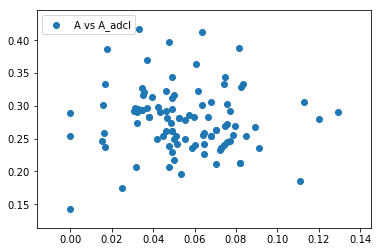

In [94]:


for score in ['A','B','C','D','E'][0:1]:
    for stats in ['_adcl', '_edpl','_prichness','_mindistl'][0:1]:
        plt.scatter(dp[score], dp[score+stats], label=score + ' vs '+ score+stats)
        plt.legend(loc='upper left')
        plt.show

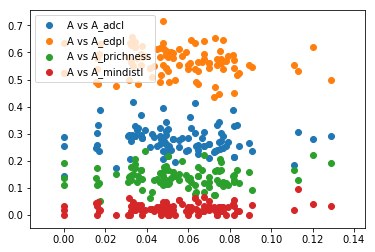

In [95]:
for score in ['A','B','C','D','E'][0:1]:
    for stats in ['_adcl', '_edpl','_prichness','_mindistl'][0:5]:
        plt.scatter(dp[score], dp[score+stats], label=score + ' vs '+ score+stats)
        plt.legend(loc='upper left')
        plt.show

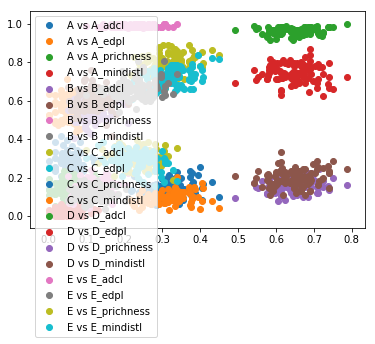

In [96]:
for score in ['A','B','C','D','E']:
    for stats in ['_adcl', '_edpl','_prichness','_mindistl']:
        plt.scatter(dp[score], dp[score+stats], label=score + ' vs '+ score+stats)
        plt.legend(loc='upper left')
        plt.show

In [97]:
dp.describe()

,A,A_mindistl,B,B_mindistl,C,C_mindistl,D,D_mindistl,E,E_mindistl,...,A_adcl,B_adcl,C_adcl,D_adcl,E_adcl,A_prichness,B_prichness,C_prichness,D_prichness,E_prichness
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.055034,0.025369,0.116043,0.114361,0.318386,0.097589,0.647292,0.198869,0.229600,0.290481,...,0.277586,0.557102,0.799584,0.962263,0.989559,0.140234,0.147809,0.142149,0.160060,0.304304
std,0.024318,0.018591,0.032415,0.030794,0.048526,0.030017,0.051736,0.042808,0.045910,0.047167,...,0.049060,0.054352,0.044362,0.017520,0.008343,0.035764,0.041895,0.037576,0.034324,0.042562
min,0.000000,0.000000,0.051724,0.037037,0.216667,0.033333,0.491803,0.109091,0.097222,0.156863,...,0.142857,0.406780,0.666667,0.916667,0.975000,0.052632,0.042553,0.056604,0.080645,0.190476
25%,0.037736,0.015873,0.095238,0.095013,0.285119,0.079132,0.612455,0.172414,0.193768,0.265789,...,0.246154,0.516532,0.773585,0.949788,0.983051,0.118395,0.123077,0.120690,0.144585,0.274194
50%,0.052178,0.020221,0.112007,0.111111,0.315789,0.096774,0.649561,0.196400,0.229508,0.298507,...,0.275986,0.563333,0.800000,0.966667,0.984615,0.137147,0.146257,0.140351,0.155048,0.306452
75%,0.072530,0.034044,0.136310,0.134615,0.346392,0.114754,0.682738,0.229823,0.261943,0.323077,...,0.301587,0.600000,0.830769,0.978723,1.000000,0.164801,0.179410,0.157540,0.180082,0.338524
max,0.129032,0.096774,0.209677,0.187500,0.448980,0.203390,0.786885,0.333333,0.339623,0.387755,...,0.416667,0.682540,0.888889,1.000000,1.000000,0.235294,0.240741,0.254545,0.244898,0.393443


# Bray-Curtis distance


In [98]:
>>> from scipy.spatial import distance
>>> distance.braycurtis([1, 0, 0], [0, 1, 0])
1.0
>>> distance.braycurtis([1, 1, 0], [0, 1, 0])
0.33333333333333331

ImportError: DLL load failed: The specified module could not be found.

In [ ]:
distance.braycurtis([1, 0, 0], [0, 1, 0])

In [ ]:
>>> distance.braycurtis([1, 1, 0], [0, 1, 0])

# Association between Bray-Curtis Distance and Sensitivity 

In [99]:
bcd = pd.read_csv("Bray-Curtis-Distance-HS.csv", index_col=0)
sensitivity = pd.read_csv("alphaDiversity_phyloEntropy.csv", index_col=0)

In [100]:
 bcd.head(),sensitivity.head()

(         rdp10398   rdp5224   rdp1017     rdp92     rdp12
 CC11CM0  0.000000  0.000000  0.000000  0.032523  0.000000
 CC11CM1  0.012653  0.012653  0.012653  0.025961  0.017573
 CC11CM2  0.002196  0.002196  0.002196  0.002196  0.002196
 CC11CM3  0.009952  0.009952  0.009952  0.009952  0.009952
 CC11CM4  0.006173  0.006173  0.011572  0.006173  0.006173,
           RDP_10398  RDP_5224  RDP_1017    RDP_92    RDP_12
 CC11CM0     3.52104   3.02461   2.01612  0.866728  0.247681
 CC11CM1     3.53484   2.95072   2.18432  0.838860  0.217677
 CC11CM10    3.51104   3.05156   2.18018  0.878181  0.245779
 CC11CM11    3.44639   2.93488   2.17424  0.900507  0.237034
 CC11CM12    3.57253   3.02328   2.22683  0.908349  0.248668)

In [101]:
# bcd-sen = pd.merge(bcd, sensitivity, left_index=True, right_index=True)
bcdsen = pd.concat([bcd, sensitivity], axis=1)

C:\Users\hsun1\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [102]:
bcdsen.head()

,rdp10398,rdp5224,rdp1017,rdp92,rdp12,RDP_10398,RDP_5224,RDP_1017,RDP_92,RDP_12
CC11CM0,0.000000,0.000000,0.000000,0.032523,0.000000,3.52104,3.02461,2.01612,0.866728,0.247681
CC11CM1,0.012653,0.012653,0.012653,0.025961,0.017573,3.53484,2.95072,2.18432,0.838860,0.217677
CC11CM10,0.000000,0.000000,0.000000,0.000000,0.007414,3.51104,3.05156,2.18018,0.878181,0.245779
CC11CM11,0.015354,0.015354,0.015354,0.015354,0.027460,3.44639,2.93488,2.17424,0.900507,0.237034
CC11CM12,0.007804,0.007804,0.007804,0.010016,0.008370,3.57253,3.02328,2.22683,0.908349,0.248668


In [103]:
# df_new = df.rename(columns={'A': 'a'}, index={'ONE': 'one'})
bcdsen = bcdsen.rename(columns={'rdp10398':'bcd_rdp10398', 'rdp10398':'bcd_rdp10398','rdp5224':'bcd_rdp5224','rdp1017':'bcd_rdp1017','rdp92':'bcd_rdp92','rdp12':'bcd_rdp12','RDP_10398':'sensitivity_rdp10398','RDP_5224':'sensitivity_rdp5224','RDP_1017':'sensitivity_rdp1017','RDP_92':'sensitivity_rdp92','RDP_12':'sensitivity_rdp12'})

In [104]:
bcdsen.head()

,bcd_rdp10398,bcd_rdp5224,bcd_rdp1017,bcd_rdp92,bcd_rdp12,sensitivity_rdp10398,sensitivity_rdp5224,sensitivity_rdp1017,sensitivity_rdp92,sensitivity_rdp12
CC11CM0,0.000000,0.000000,0.000000,0.032523,0.000000,3.52104,3.02461,2.01612,0.866728,0.247681
CC11CM1,0.012653,0.012653,0.012653,0.025961,0.017573,3.53484,2.95072,2.18432,0.838860,0.217677
CC11CM10,0.000000,0.000000,0.000000,0.000000,0.007414,3.51104,3.05156,2.18018,0.878181,0.245779
CC11CM11,0.015354,0.015354,0.015354,0.015354,0.027460,3.44639,2.93488,2.17424,0.900507,0.237034
CC11CM12,0.007804,0.007804,0.007804,0.010016,0.008370,3.57253,3.02328,2.22683,0.908349,0.248668


In [105]:
# objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
# y_pos = np.arange(len(objects))
# performance = [10,8,6,4,2,1]
# plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
# plt.title('Programming language usage')
# plt.show()

In [106]:
# objects=('bcd_rdp10398','bcd_rdp5224','bcd_rdp1017','bcd_rdp92','bcd_rdp12','sensitivity_rdp10398','sensitivity_rdp5224','sensitivity_rdp1017','sensitivity_rdp92','sensitivity_rdp12)
# plt.bar(bcdsen.bcd_rdp10398, )

<function matplotlib.pyplot.show>

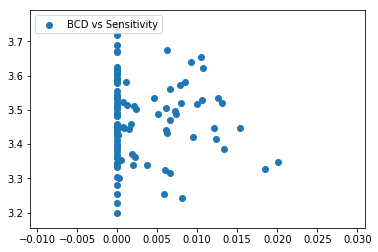

In [107]:
        plt.scatter(bcdsen['bcd_rdp10398'], bcdsen['sensitivity_rdp10398'], label='BCD vs Sensitivity' )
        plt.legend(loc='upper left')
        plt.show

<function matplotlib.pyplot.show>

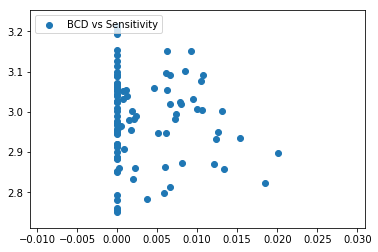

In [108]:

plt.scatter(bcdsen['bcd_rdp5224'], bcdsen['sensitivity_rdp5224'], label='BCD vs Sensitivity' )
plt.legend(loc='upper left')
plt.show

<function matplotlib.pyplot.show>

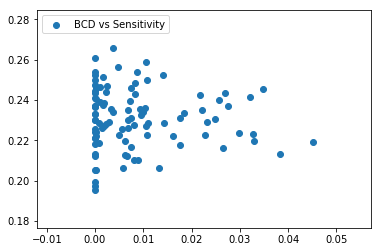

In [109]:
plt.scatter(bcdsen['bcd_rdp12'], bcdsen['sensitivity_rdp12'], label='BCD vs Sensitivity' )
plt.legend(loc='upper left')
plt.show

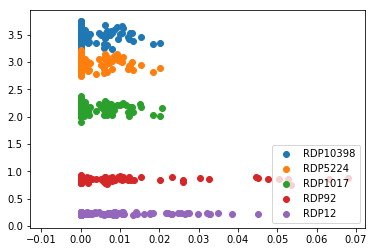

In [110]:
for refindex in ['10398', '5224','1017','92','12']:
    plt.scatter(bcdsen['bcd_rdp'+refindex], bcdsen['sensitivity_rdp' + refindex ], label='RDP'  + refindex)
    plt.legend(loc='lower right')
    plt.show;
    plt.savefig('bcd-sen.png')

<!-- ##  x axis is the Bray-Curtis distance, and y axis is the sensitivity in percent. Each dot is one community. Different colors indicate data using different references. -->

# Exploring data

# Adcl 

# Adcl plot all sequences in 5 reference sets

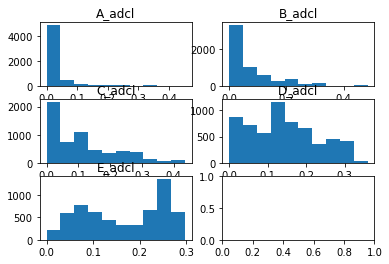

In [111]:
plot_pplacer('_adcl')

In [112]:
def plot_pplacer_cutoff(variable, cutoff):
    fig, axes = plt.subplots(nrows=3, ncols=2)
    ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

    ax0.hist(df['A'+variable][df['A'+variable]>cutoff])
    ax0.set_title('A'+variable + ' larger than the cutoff' )

    ax1.hist(df['B'+variable][df['B'+variable]>cutoff])
    ax1.set_title('B'+variable)

    ax2.hist(df['C'+variable][df['C'+variable]>cutoff])
    ax2.set_title('C'+variable)

    ax3.hist(df['D'+variable][df['D'+variable]>cutoff])
    ax3.set_title('D'+variable)
    ax4.hist(df['E'+variable][df['E'+variable]>cutoff])
    ax4.set_title('E'+variable)

# Plot adcl with bad values larger than 0.001

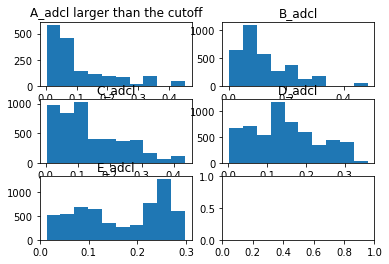

In [113]:
plot_pplacer_cutoff('_adcl', 0.001)

# Plot adcl with bad values larger than 0.15

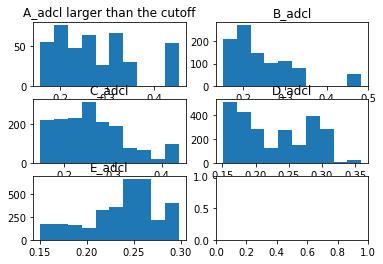

In [114]:
plot_pplacer_cutoff('_adcl', 0.15)

# edpl

In [115]:
from scipy.stats import median_test
from scipy.stats import skew
# stat, p, med, tbl = median_test(g1, g2, g3)

ImportError: DLL load failed: The specified module could not be found.

In [ ]:
stat, p, med, tbl = median_test(df['A_edpl'], df['B_edpl'], df['C_edpl'],df['D_edpl'],df['E_edpl'])

In [ ]:
stat,p,med,tbl

In [ ]:
# stat is The default is Pearson’s chi-squared statistic.
# tbl: contingency table is the number of counts above (first) or below (second) the median
# median is the grand median of all the data

In [ ]:
stat_prichness, p_prichness, med_prichness, tbl_prichness = median_test(df['A_prichness'], df['B_prichness'], df['C_prichness'],df['D_prichness'],df['E_prichness'])

In [ ]:
stat_prichness, p_prichness, med_prichness, tbl_prichness

In [ ]:
skew(df.A_prichness),skew(df.B_prichness),skew(df.C_prichness),skew(df.D_prichness),skew(df.E_prichness)

In [ ]:
skew(df.A_edpl),skew(df.B_edpl),skew(df.C_edpl),skew(df.D_edpl),skew(df.E_edpl)

In [ ]:
from scipy import stats
#  stats.percentileofscore([1, 2, 3, 4], 3)

In [ ]:
stats.percentileofscore(df.A_prichness,3),stats.percentileofscore(df.B_prichness,3),stats.percentileofscore(df.C_prichness,3),stats.percentileofscore(df.D_prichness,3),stats.percentileofscore(df.E_prichness,3)